In [176]:
#Gregory Sylvester
#CSI 5810 HW 3

#librays some of these libraries dont get used because when i rewrite broken functions or change code that no longer requires them i dont remove them from below
import numpy as np
import numpy.linalg as linalg
import numpy.random as random
import matplotlib as plt
import pandas as pd
import math
import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from nltk.corpus import stopwords
import nltk.tokenize as tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('brown')

from nltk.corpus import stopwords
from nltk.corpus import brown

stop_words = set(stopwords.words('english'))
english_words = set(brown.words())
#file directory for stored files
from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/CSI5810HW3.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CSI5810HW3.ipynb to html
[NbConvertApp] Writing 993028 bytes to /content/drive/MyDrive/Colab Notebooks/CSI5810HW3.html


# **Problem 1**
---
The following examples from a two-class classification problem are given:
Class1: [2 2]T
, [3 5]T
; Class 2 [1 3]T
, [-1 -0.5]T
Starting with an augmented weight vector, [1 1 1]T
, determine a solution vector for
above data using the perceptron learning rule. Show first five steps of weight vector
updating.

In [ ]:
#in the slides the augemented bias term is added to the zero index of the weight vecotrs and class examples.
#however below the weight matrix has the bias term at the last index
#if the classes are not linearly separable, learning will not cease


x_train = np.array([[2,2,1],[3,5,1],[1,3,1],[-1,-.5,1]])
y_train = np.array([1,1,-1,-1])
y_hat = np.array([0,0,0,0])
weights = np.random.rand(3)

for i in range(10):

  print("___________________________________\niteration ", i + 1)
  for j in range(x_train.shape[0]):
    #find the sum of values
    sum = np.sum(weights * x_train[j,:])


    if sum >= 0:
      out = 1
    else:
      out = -1


    if y_train[j] != out:
      weights = weights + y_train[j] * x_train[j]
      print('updated weights', weights,'| x:', x_train[j],'| y:', y_train[j],'| out:', out)

    y_hat[j] = out
  print('y train = ',y_train)
  print('y hat  = ', y_hat)

___________________________________
iteration  1
updated weights [-0.18713557 -2.78698413 -0.66486837] | x: [1. 3. 1.] | y: -1 | out: 1
updated weights [ 0.81286443 -2.28698413 -1.66486837] | x: [-1.  -0.5  1. ] | y: -1 | out: 1
y train =  [ 1  1 -1 -1]
y hat  =  [1 1 1 1]
___________________________________
iteration  2
updated weights [ 2.81286443 -0.28698413 -0.66486837] | x: [2. 2. 1.] | y: 1 | out: -1
updated weights [ 1.81286443 -3.28698413 -1.66486837] | x: [1. 3. 1.] | y: -1 | out: 1
y train =  [ 1  1 -1 -1]
y hat  =  [-1  1  1 -1]
___________________________________
iteration  3
updated weights [ 3.81286443 -1.28698413 -0.66486837] | x: [2. 2. 1.] | y: 1 | out: -1
y train =  [ 1  1 -1 -1]
y hat  =  [-1  1 -1 -1]
___________________________________
iteration  4
y train =  [ 1  1 -1 -1]
y hat  =  [ 1  1 -1 -1]
___________________________________
iteration  5
y train =  [ 1  1 -1 -1]
y hat  =  [ 1  1 -1 -1]
___________________________________
iteration  6
y train =  [ 1  1 -1 -1]

#**Problem 2**
-----
Consider the following six examples with three attributes:

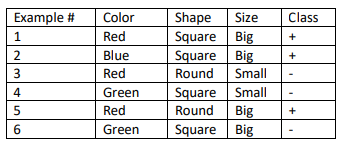

Determine the best attribute for root node of a decision tree classifier for above data.
Use Gini index for attribute selection.

In [ ]:
data = np.array([[1,1,1,1],
                 [2,1,1,1],
                 [1,2,2,2],
                 [3,1,2,2],
                 [1,2,1,1],
                 [3,1,1,2]])

#red = 1; blue = 2 ; green = 3
#square = 1; round = 2
#big = 1; small = 2
#+ = 1 ; - = 2

In [ ]:
#class returns all the gini coefficents of attributes (assuming attributes are column wise and rows are instances, last row is classification)
def Gini(matrix):
    num_attributes = matrix.shape[1] - 1
    output = np.zeros(num_attributes)

    for i in range(num_attributes):
        uq_val, unique_counts = np.unique(matrix[:, i], return_counts=True)
        output[i] = 1 - np.sum(np.square(np.divide(unique_counts,matrix.shape[0])))

    return output


In [ ]:
print(Gini(data))

[0.61111111 0.44444444 0.44444444]


Best Split appears to be color

#**Problem 3**
-----
Consider the network of neurons shown below. With the current input and the weights
as shown, determine the output of the network. Assume sigmoidal activation function.
With the specified target output of “1”, determine the value of the updated weight for
the connection linking U3 and U5, and U3 and U1.

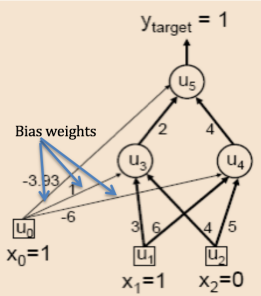

This process of updating the Weights and Bias terms in the model is Backpropagation by finding the gradient of loss of the sigmodial activation funcion which is defined below

Sigmodial Activation Function:
\begin{align}
    {σ(x)} = \frac{1}{1 + e^x}
  \end{align}
Now we need to calculate the loss functions partial derivative with respect to the node.

The loss function is defined as below:
k = (node) | t = (Target Value) | a = (activation Function)
\begin{align}
{E} = \frac{1}{2} \sum_{k}(t_k - a_k)^2
  \end{align}

We can refine this to be fit this to out model more appropriately below:
\begin{align}
J(w) = \frac{1}{2} \sum_{i}^n (y_i - w^tx_i)^2
=\hat{y} - y
  \end{align}

In the slides we use MSE (Mean Square Error) to update the weights by finding the partial derivative of the loss function with respect to the weight. This is equivalent to finding the best reduction in error amoung all the weights. With all this we can define the best reduction in error with repect to weights to be;
\begin{align}
\delta w_j = - E *\hat{y}(1 - \hat{y}) * x_{ij}
  \end{align}
this is then subtracted from the weight function on instance i
Below is an image of the calculation for finding the error and the updated weights from U3 -> U5 & U1 -> U3:



In [ ]:
def sigma(value):
  return 1/(1 + math.e ** (value))

def deltaWeight(pred_val,act_val,x, old_weight):
  return old_weight - (act_val - pred_val)*(pred_val *(1-pred_val))*x


In [ ]:
u3 = sigma(12)
u4 = sigma(4)
u5 = sigma((2*u3 + 4*u4-3.93))



print(u3,u4,"output is: ",u5)
#(manually calculated)iteration one you back propgate
w1 = deltaWeight(u5,1,u3,2)
w2 = deltaWeight(2*u3,deltaWeight(u5*1,1,u3,2)*u3,1,3)
u3_2 = sigma(1+w2*1)
u5_2 = sigma(-3.93+w1*u3_2+u4*4)

print("new weight u3->u5 = " ,deltaWeight(u5,1,u3,2))
print("new weight u1->u3 = " ,deltaWeight(2*u3,deltaWeight(u5*1,1,u3,2)*u3,1,3))
print('new predicted value:', u5_2)

6.1441746022147215e-06 0.017986209962091562 output is:  0.9793271168530865
new weight u3->u5 =  2.0000000025715408
new weight u1->u3 =  3.0
new predicted value: 0.9785863977582316


#**Problem 4**
-----
Generate 250 examples each from two classes as per the picture shown below and train
a two-layer feedforward network with three sets of hidden neurons, 10, 20, and 30. In
each case, determine the training and test accuracy and plot the resulting boundaries.
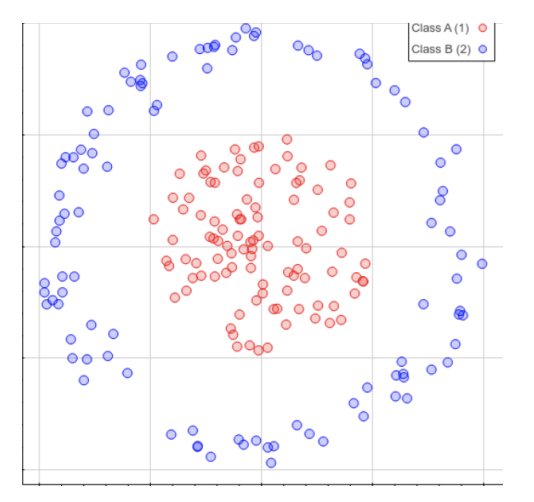

In [88]:
#generate the classes below

data_1 = np.random.rand(125,2)
data_2 =  np.random.rand(125,2)

displace = np.array([10,10])

data_1 = data_1 + displace
focus = np.array([10.5,10.5])
r = .5

end = False
while end != True:
  end = True
  for i in range(data_1.shape[0]):
    dist = np.sqrt(((data_1[i,0]-10.5) **2 + (data_1[i,1]-10.5) **2))
    if dist >= .5:
      data_1[i,:] = np.random.rand(1,2) + focus
      end = False

data_2 = data_2*3 -1.5
end = False
while end != True:
  end = True
  for i in range(data_2.shape[0]):
    dist = np.sqrt(((data_2[i,0]) **2 + (data_2[i,1]) **2))
    if  1 > dist  or dist >= 1.5:
      data_2[i,:] = 3 * np.random.rand(1,2)-1.5
      end = False

data_2 = data_2 + focus

class_labels_1 = np.zeros((data_1.shape[0], 1))
class_labels_2 = np.ones((data_2.shape[0], 1))

data_1_with_labels = np.hstack((data_1, class_labels_1))
data_2_with_labels = np.hstack((data_2, class_labels_2))

data = np.array(np.vstack((data_1_with_labels, data_2_with_labels)))


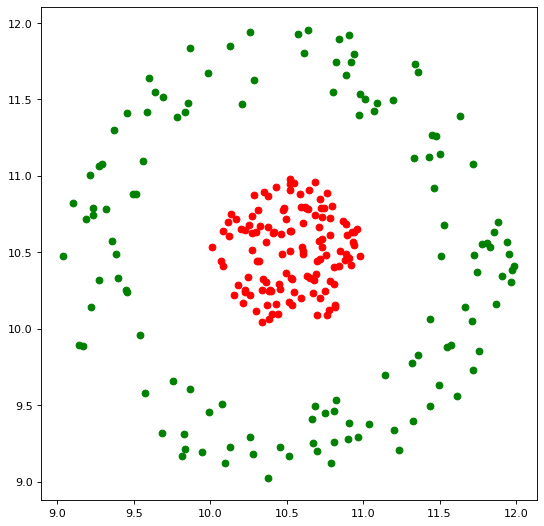

In [89]:
#plot Generated values
plt.pyplot.figure(figsize=(8, 8), dpi=80)
plt.pyplot.scatter(data_1[:,0],data_1[:,1],c='Red' )
plt.pyplot.scatter(data_2[:,0],data_2[:,1],c='Green')
plt.pyplot.show()

In [90]:
np.random.shuffle(data)
y_train = data[:200, 2]
y_test = data[200:, 2]

x_train = data[:200, :-1]
x_test = data[200:, :-1]

In [99]:

mlp10 = MLPClassifier(hidden_layer_sizes=(10,5), activation="logistic", solver='lbfgs', learning_rate='adaptive',learning_rate_init = .05, batch_size=50, max_iter=10000)
mlp10.fit(x_train, y_train)

results = mlp10.predict(x_test)

In [100]:
print("Training Accuracy: {:.2f}".format(mlp10.score(x_train, y_train)))
y_pred = mlp10.predict(x_test)
print("Test Accuracy: {:.2f}".format(mlp10.score(x_test, y_test)))
y_pred = mlp10.predict(x_test)

Training Accuracy: 1.00
Test Accuracy: 1.00


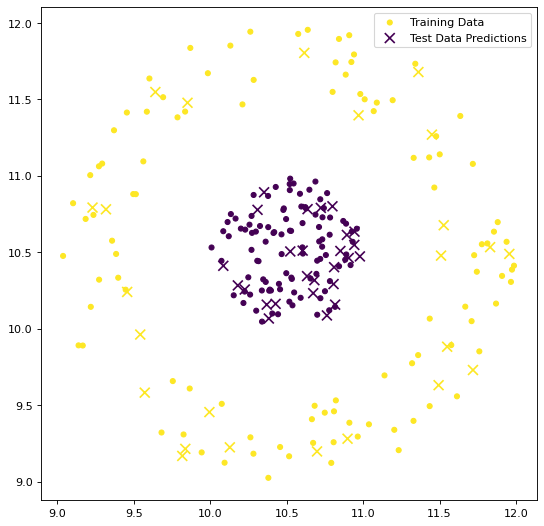

In [101]:
plt.pyplot.figure(figsize=(8, 8), dpi=80)
plt.pyplot.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=20, label='Training Data')
plt.pyplot.scatter(x_test[:, 0], x_test[:, 1], c=results, marker="x", s=80, label='Test Data Predictions')
plt.pyplot.legend()
plt.pyplot.show()

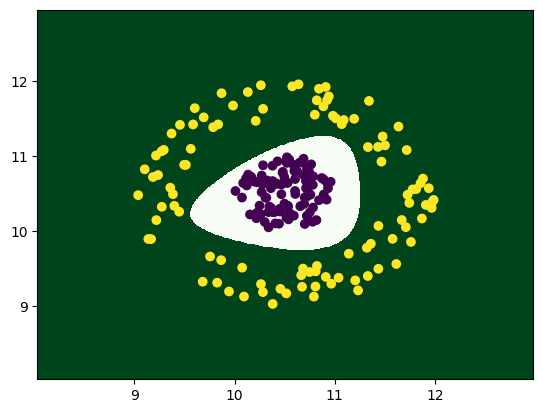

In [102]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = mlp10.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pyplot.pcolormesh(xx,yy,Z,cmap="Greens")
plt.pyplot.scatter(x_train[:, 0], x_train[:, 1], c=y_train, marker='o')
plt.pyplot.show()

After changein the amount of neurons from 10 -> 20 -> 30 the only difference created will be a higher computational demand with little to no overfitting this is because the learning rate is set to adaptaive. So by the time you start to overfit the model the change in the weight valus will be so small it wont affect the boundries enugh to decrease test accuracy.

#**Problem 5**
-----
The folder “TextFiles for Assignment 3” posted on Moodle contains 8 text
files. You are to apply text-processing steps including stop word filtering to obtain termdocument matrix under Boolean Model. Using this matrix, calculate similarity between
all document pairs and show your results in the form of an 8x8 matrix. Use Jaccard’s
similarity measure. Next, determine the vector space representation for each document
and calculate the 8x8 document similarity matrix using Cosine measure of similarity

In [109]:


#read in all the text files
l1 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/lyrics1.txt", "r").read()
l2 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/lyrics2.txt", "r").read()
l3 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/lyrics3.txt", "r").read()
l4 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/lyrics4.txt", "r").read()
l5 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/rhym1.txt", "r").read()
l6 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/rhym2.txt", "r").read()
l7 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/rhym3.txt", "r").read()
l8 = open("/content/drive/MyDrive/HW Files/CSI5810/HW3/Text_Files/rhym4.txt", "r").read()



In [184]:
def booleanModel(strings):
  count_vectorizer = CountVectorizer(binary=True,stop_words="english")
  count_vectorizer.fit(strings)
  binary_matrix = count_vectorizer.transform(strings).toarray()

  return binary_matrix

def tfidfVec(strings):
  tfidf_vectorizer = TfidfVectorizer(stop_words="english")
  vectors = tfidf_vectorizer.fit_transform(strings)
  return vectors.toarray()


In [154]:
bm = booleanModel([l1,l2,l3,l4,l5,l6,l7,l8])

In [191]:
def jac(boolModel):
  le = boolModel.shape[0]
  jaccard_similarities_matrix = np.zeros((8,8))
  print(jaccard_similarities_matrix.shape)
  for i in range(le):
    for j in range(le):
      jaccard_similarities_matrix[i,j] = jaccard_score(boolModel[i],boolModel[j])
  return jaccard_similarities_matrix

def cos(strings):
  vectorMatrix = tfidfVec(strings)
  cosine_similarities_matrix = cosine_similarity(vectorMatrix)
  return cosine_similarities_matrix

In [192]:
jaccardValue = jac(bm)
j = pd.DataFrame(jaccardValue)
print(j)

cosValue = cos([l1,l2,l3,l4,l5,l6,l7,l8])
c = pd.DataFrame(cosValue)
print(c)


(8, 8)
          0         1         2         3         4         5         6  \
0  1.000000  0.038462  0.000000  0.028571  0.029412  0.000000  0.000000   
1  0.038462  1.000000  0.000000  0.027027  0.027778  0.000000  0.028571   
2  0.000000  0.000000  1.000000  0.052632  0.000000  0.000000  0.000000   
3  0.028571  0.027027  0.052632  1.000000  0.000000  0.000000  0.000000   
4  0.029412  0.027778  0.000000  0.000000  1.000000  0.076923  0.062500   
5  0.000000  0.000000  0.000000  0.000000  0.076923  1.000000  0.000000   
6  0.000000  0.028571  0.000000  0.000000  0.062500  0.000000  1.000000   
7  0.026316  0.000000  0.000000  0.000000  0.000000  0.000000  0.050000   

          7  
0  0.026316  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  
5  0.000000  
6  0.050000  
7  1.000000  
          0         1         2         3         4         5         6  \
0  1.000000  0.028864  0.000000  0.029598  0.031155  0.000000  0.000000   
1  0.028864  1.000000  0.000000  0.018858